<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [3]:
# YOUR CODE HERE
import pandas as pd
import numpy as np

past = pd.read_csv('../dat/past.csv.gz')

In [4]:
past.head(5)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0


In [5]:
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [8]:
# YOUR CODE HERE
print(f"{past['Purchased?'].sum()/past.shape[0]:.02%} of interactions resulted in purchases")

34.38% of interactions resulted in purchases


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [11]:
# YOUR CODE HERE
# YOUR CODE HERE

X = past.drop(['product_id', 'user_id'], axis=1)
X.head(5)

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,0.000,1.000,...,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0
1,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,3.750,2.250,...,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0
2,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,17.250,30.000,...,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0
3,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,3.250,10.500,...,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0
4,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,4.875,3.375,...,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0


In [12]:
y = X.pop('Purchased?')

In [18]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler  = StandardScaler()

X_train = scaler.fit_transform(X_train)

pca = PCA(n_components=5, whiten=True)

X_reduced = pca.fit_transform(X_train)
X_reduced.shape


(4000, 5)

In [79]:
assert X_reduced.shape == (5000, 5)

AssertionError: 

5. Print out the percentage of variance explained by each of the selected components.

In [116]:
pca.explained_variance_ratio_

# YOUR CODE HERE

array([0.10288908, 0.09291722, 0.06522504, 0.05215619, 0.04321241])

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [117]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [118]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

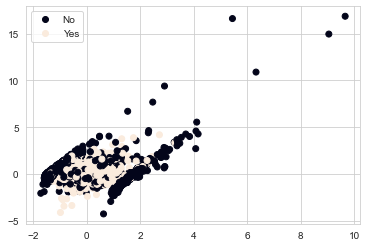

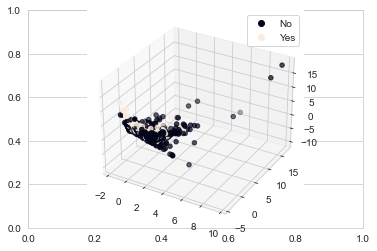

In [119]:
# YOUR CODE HERE
# YOUR CODE HERE

visualize_2pcs(X_reduced, y_train)

visualize_3pcs(X_reduced, y_train)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [120]:
# YOUR CODE HERE (imports!)
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    if standardize is True:
        scaler = preprocessing.StandardScaler().fit(X_train)

    if hasattr(X_train, 'columns'):
        X_train = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
    else:
        X_train = scaler.transform(X_train)

    clf = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)
    results = clf.predict(X_test)

    target_names = ['No', 'Yes']
    print(classification_report(y_test, results, target_names=target_names))


Now apply the pipeline on the all the features `X` and review the performance

In [121]:
train(X,y,True)

              precision    recall  f1-score   support

          No       0.75      0.77      0.76       649
         Yes       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [122]:
pca = PCA(n_components=5, whiten=True)
X_reduced = pca.fit_transform(X)

# If you do train / test AFTER pca there is leakage

train(X_reduced,y,True)

              precision    recall  f1-score   support

          No       0.74      0.71      0.73       649
         Yes       0.50      0.53      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.66      0.65      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [123]:
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [124]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeanModel = KMeans(n_clusters=k, random_state=10).fit(X)
        inertias.append(kmeanModel.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

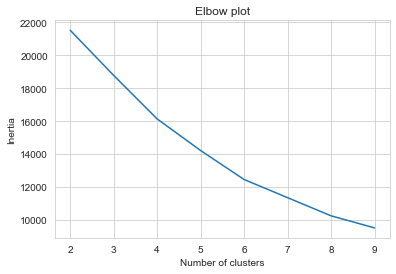

In [125]:
# YOUR CODE HERE
visualize_elbow(X_reduced, range(2,10))

4. What are the disadvantage to use the Elbow method? 

   > It is not always the best indicator to show the "elbows" or the inflection points. The inertia will decrease as the number of clusters are increased without a visually significant elbow.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [102]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.2494970291599605
For n_clusters = 3 The average silhouette_score is : 0.2571879429880909
For n_clusters = 4 The average silhouette_score is : 0.27035866872654535
For n_clusters = 5 The average silhouette_score is : 0.2950512726183457
For n_clusters = 6 The average silhouette_score is : 0.2409558074299428
For n_clusters = 7 The average silhouette_score is : 0.2465409273723537
For n_clusters = 8 The average silhouette_score is : 0.27045936879381993


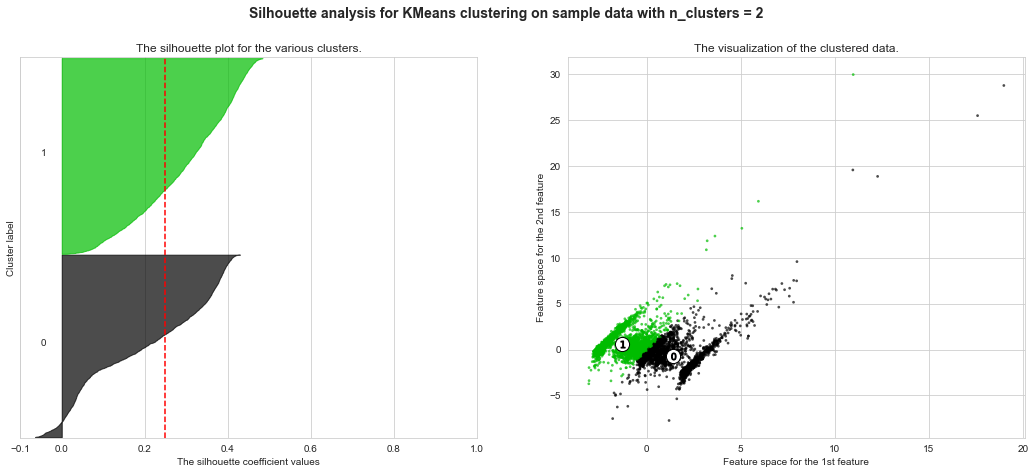

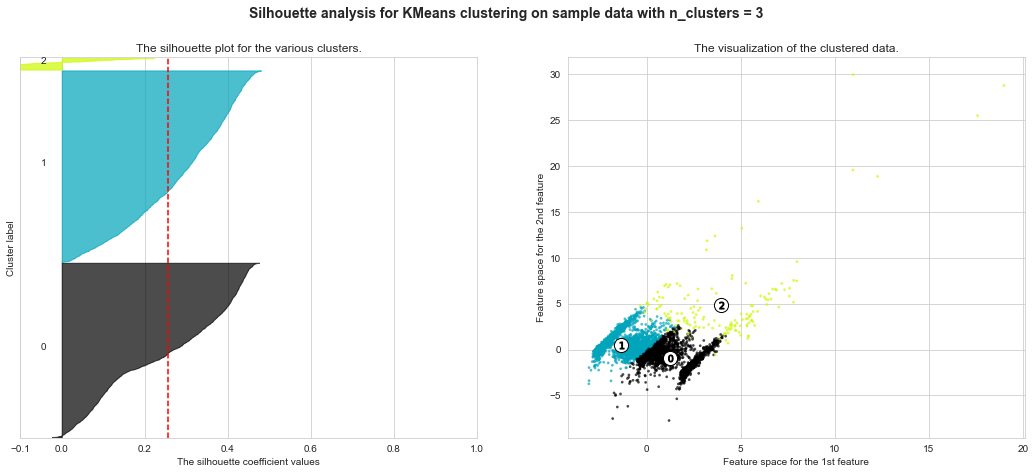

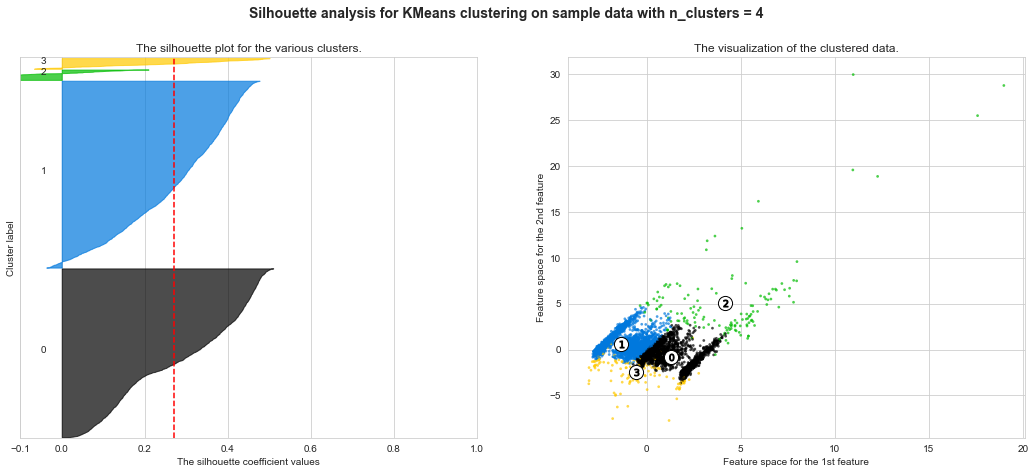

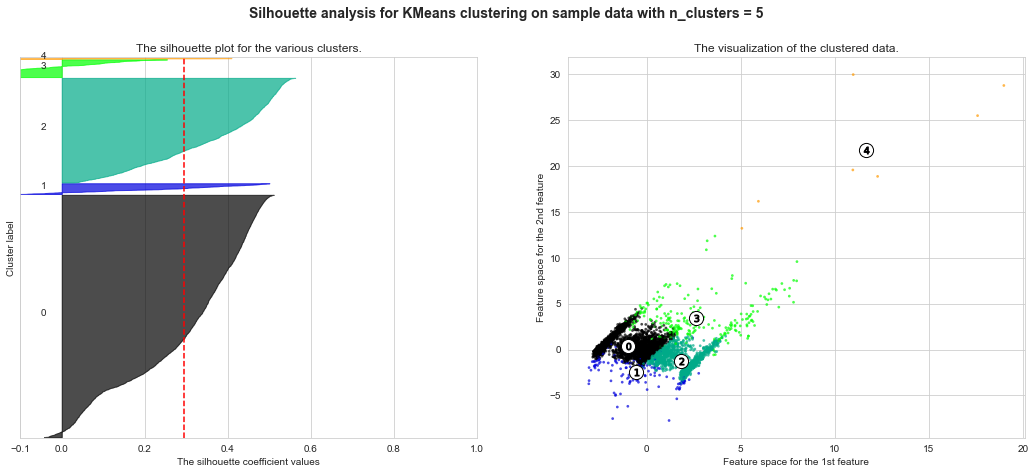

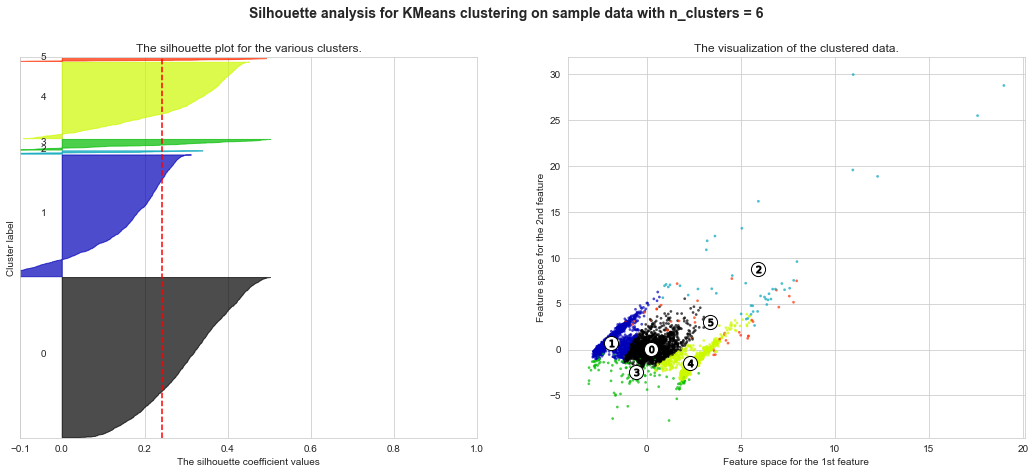

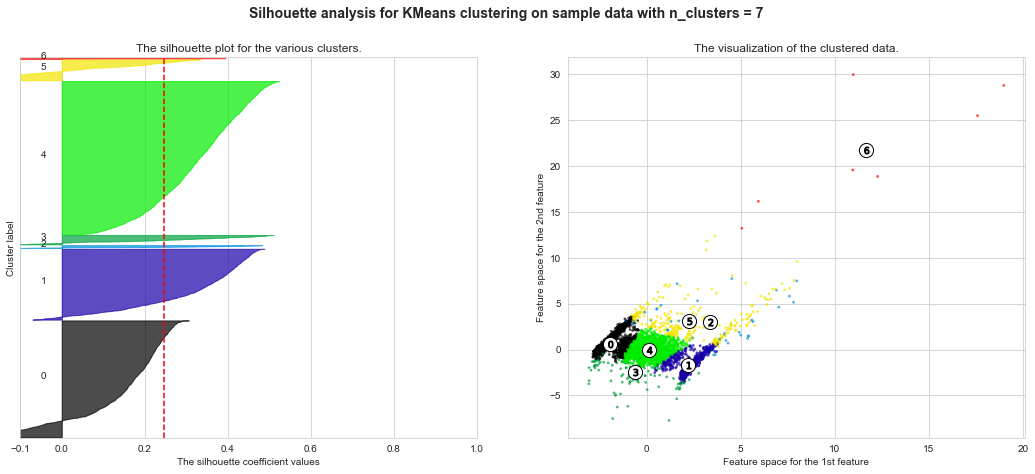

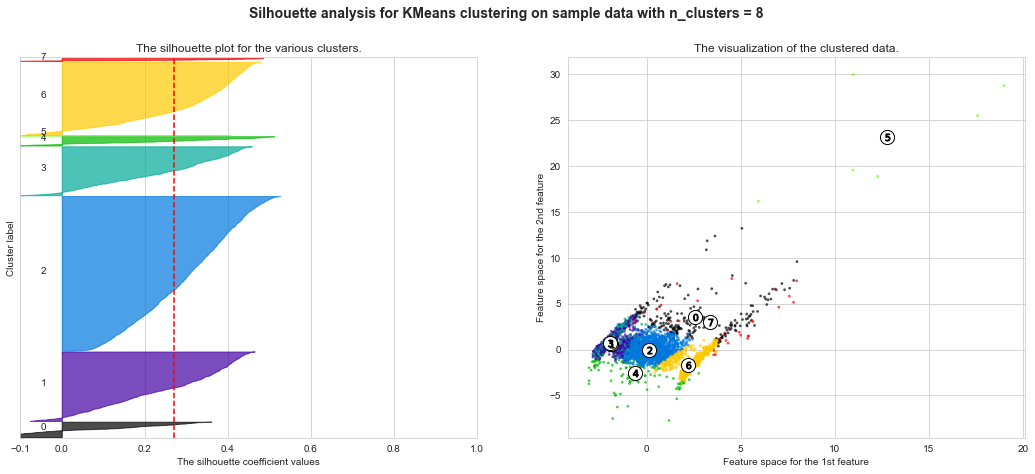

In [105]:
visualize_silhouette(8, X_reduced)# YOUR CODE HERE

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [131]:
# YOUR CODE HERE
from sklearn.cluster import KMeans
km = 4
kmeans = KMeans(n_clusters=km, random_state=10)
kmeans.fit(X_reduced)

KMeans(n_clusters=4, random_state=10)

7. What is the size of each cluster? 

In [132]:
labels = kmeans.labels_
labels_count = [0]*4
for x in labels:
    labels_count[x] += 1
for x in range(len(labels_count)):
    print(f"Cluster: {x}, Count: {labels_count[x]}")

Cluster: 0, Count: 2301
Cluster: 1, Count: 2509
Cluster: 2, Count: 151
Cluster: 3, Count: 39


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [137]:
# YOUR CODE HERE
past['cluster_pca'] = labels
past.head()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0,0
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0,0
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0,0
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0,0
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0,1


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*

In [138]:
# YOUR CODE HERE
tmp = past.groupby('cluster_pca').describe().T
tmp.head(16)

cluster_pca                  0             1             2             3
product_id count  2.301000e+03  2.509000e+03  1.510000e+02  3.900000e+01
           mean   5.604502e+06  5.545995e+06  5.493436e+06  5.852997e+06
           std    1.109647e+06  1.201486e+06  1.383668e+06  7.364465e+04
           min    4.185000e+03  4.104000e+03  5.379000e+03  5.645756e+06
           25%    5.771105e+06  5.750373e+06  5.790646e+06  5.823320e+06
           50%    5.839053e+06  5.823478e+06  5.864469e+06  5.884465e+06
           75%    5.884062e+06  5.862717e+06  5.893196e+06  5.904523e+06
           max    5.932538e+06  5.916644e+06  5.931773e+06  5.931329e+06
user_id    count  2.301000e+03  2.509000e+03  1.510000e+02  3.900000e+01
           mean   5.325939e+08  5.149954e+08  5.353893e+08  4.917291e+08
           std    5.910559e+07  5.915130e+07  5.380317e+07  9.057826e+07
           min    1.219156e+08  6.524181e+07  1.439953e+08  1.319941e+08
           25%    5.071074e+08  4.937943e+08  5.172498e+08  4.538641e+08
           50%    5.401509e+08  5.282514e+08  5.463438e+08  4.975934e+08
           75%    5.713591e+08  5.560091e+08  5.669192e+08  5.652300e+08
           max    6.220262e+08  5.971146e+08  6.151285e+08  6.099770e+08

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

> The basic assumptions of k-means are:
you need to choose the number of clusters arbitrarily
every data point belongs to strictly one cluster.

> K-means is antiquated at best but still a popular algorithm. It is fast, simple to understand, and requires little knowledge about the dataset.
> If I want to do clustering, not very familiar with my data, K-means is probably my first choice.
> There are downsides of k-means:

> (1) You have to choose the number of clusters. Clustering algorithm requires you to define something, but it may be cumbersome.
> (2) It is not deterministic. One can solve this problem partly, by running the algorithm many times and using methods of selecting starting points (like K-means++), but when it comes to really large datasets, this is a drawback.
> (3) It is prone to outliers. They can change the clustering results heavily.
> (4) It cannot detect outliers. By definition, all the points are members of a cluster.
> (5) It doesn't work well with some type of datasets. If the clusters are not linearly separable, k-means behaves poorly.

In [139]:
# YOUR CODE HERE
tmp.loc[['minPrice', 'maxPrice'], :]

cluster_pca               0            1           2          3
minPrice count  2301.000000  2509.000000  151.000000  39.000000
         mean      6.182007     5.621403   57.209724   4.206026
         std       5.748940     5.130123   34.260532   4.042208
         min       0.000000     0.000000    1.350000   0.000000
         25%       2.520000     2.380000   38.518750   1.255000
         50%       4.490000     4.130000   46.020000   3.173333
         75%       7.440000     6.784000   62.982373   6.205000
         max      35.560000    32.970000  236.510000  17.460000
maxPrice count  2301.000000  2509.000000  151.000000  39.000000
         mean      6.214735     5.644199   57.263847   4.609188
         std       5.766383     5.134257   34.259480   3.850573
         min       0.000000     0.000000    1.590000   0.000000
         25%       2.540000     2.380000   38.518750   1.490000
         50%       4.553333     4.140000   46.020000   4.000000
         75%       7.460000     6.830000   63.015000   6.205000
         max      35.560000    32.970000  236.510000  17.460000

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

In [140]:
# We manage to define a cluster of goods that are not often being purchased.
# From the business perspective, this may be good info.
tmp.loc['Purchased?', :]

cluster_pca,0,1,2,3
count,2301.000000,2509.000000,151.000000,39.000000
mean,0.332899,0.354723,0.403974,0.051282
std,0.471353,0.478525,0.492325,0.223456
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


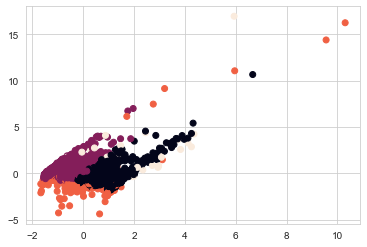

In [141]:
f = plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=past.cluster_pca);

In [142]:
pd.DataFrame(X_reduced).describe()

,0,1,2,3,4
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.842171e-18,5.400125e-17,2.557954e-17,5.471179e-17,-4.831691e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.669314e+00,-4.384106e+00,-9.636088e+00,-8.515188e+00,-8.370767e+00
25%,-7.628716e-01,-5.094085e-01,-4.202698e-01,-4.114654e-01,-4.996587e-01
50%,-6.009643e-02,-3.476465e-02,-1.424486e-01,-1.777876e-01,-2.494202e-05
75%,6.517583e-01,4.116084e-01,2.013388e-01,1.281636e-01,5.080527e-01
max,1.030768e+01,1.696568e+01,1.884487e+01,2.004821e+01,1.552864e+01


In [143]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples = 15)
dbclusters = dbscan.fit_predict(X_reduced)

past['dbclusters'] = dbclusters
past.groupby('dbclusters').describe().T.loc['Purchased?', :]

dbclusters,-1,0
count,1245.000000,3755.000000
mean,0.220884,0.384554
std,0.415009,0.486554
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [144]:
# YOUR CODE HERE
new = pd.read_csv('../dat/new.csv.gz')
print (new.shape)
print (new.columns)
new.head()

(30091, 5)
Index(['product_id', 'maxPrice', 'minPrice', 'Purchased?', 'Category'], dtype='object')


,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


In [145]:
assert new.shape == (30091, 5)

In [146]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


In [147]:
len(new.Category.unique())

724

2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

>The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [148]:
# YOUR CODE HERE
np.intersect1d(past.product_id, new.product_id)

array([], dtype=int64)

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [149]:
# YOUR CODE HERE # ~.344
new['Purchased?'].mean()

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [150]:
# YOUR CODE HERE
# A bit unclear on wording of this problem.

train_cols = ['maxPrice', 'minPrice', 'Category']
label_col = 'Purchased?'

X_train = past[train_cols].to_numpy()
X_test = new[train_cols].to_numpy()
y_train = past[label_col].to_numpy()
y_test = new[label_col].to_numpy()

print ('X train shape:', X_train.shape)
print ('X test shape:', X_test.shape)
print ('y train shape:', y_train.shape)
print ('y test shape:', y_test.shape)

X train shape: (5000, 3)
X test shape: (30091, 3)
y train shape: (5000,)
y test shape: (30091,)


In [151]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [152]:
# YOUR CODE HERE
# Using pipelines

X_train = past[train_cols]
X_test = new[train_cols]
y_train = past[label_col]
y_test = new[label_col]

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['maxPrice', 'minPrice', 'Category']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(class_weight = 'balanced', max_iter=500)
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", lr_model)]
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [155]:
# YOUR CODE HERE
X = pd.concat([X_train, X_test], ignore_index=True)

In [156]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [157]:
# YOUR CODE HERE
y = np.array(list(y_train) + [-1] * (len(X) - len(y_train)))

In [158]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [159]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading
ls_model = LabelSpreading(kernel='knn', alpha=0.01)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", ls_model)]
)

model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['maxPrice', 'minPrice',
                                                   'Category'])])),
                ('model', LabelSpreading(alpha=0.01, kernel='knn'))])

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [160]:
semi_sup_preds = ls_model.transduction_
print('Verify check -> Okay:',
      (y[:len(X_train)] == semi_sup_preds[:len(X_train)]).all())
semi_sup_preds = semi_sup_preds[len(X_train):]

Verify check -> Okay: True


In [161]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [162]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     19732
           1       0.85      0.68      0.75     10359

    accuracy                           0.85     30091
   macro avg       0.85      0.81      0.82     30091
weighted avg       0.85      0.85      0.84     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



> **Areas for improvement**:
> This solution could be improved generally, but in the beginning I would focus on improving recall, especially for labels=1.
It could be done in many ways, I would start with building model cascades (outputs from one model are used as an inpur for another model), and/or with some bagging/busting methods.
> **Reasons for improvement**:
> If launching new products is cheap, we do not want to skip the opportunity, therefore we need to push recall as high as possible while at the same time trying to keep precision at a certain level. For example, how good we can go with recall given the precision is at least 80% or 70%?
> On the other hand, if the cost of launching a new product is high, and there are many options, we want to push the precision as high as possible. This way, we may expect that if we decide to launch a new product, we will succeed.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)